# League Of Legends - Classification Problem


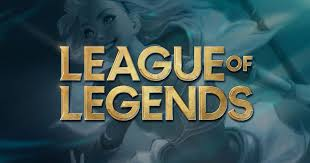

In [249]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
league = pd.read_csv(r'C:\Users\USER\Desktop\מבוא למדעי הנתונים\ranked_10min.csv')
pd.set_option("max_columns", None)
league.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Deleting the colum of 'gameId' because it doesn't contribute for understanding the data


In [250]:
league.drop(['gameId'], axis = 1, inplace=True)

Predicting the victory of a team just from one column of information to form a basic knowledge of what column to keep and what to discard

In [251]:
y = league.blueWins
y = np.array(y)
x = league
knn = KNeighborsClassifier(n_neighbors=3)
X = []
Acc = []
col = []
t=0
for i in league:
    temp = league[i]
    temp = pd.DataFrame(temp)
    knn.fit(temp, y)
    y_pred = knn.predict(temp)
    acc = metrics.accuracy_score(y, y_pred)
    Acc.append(acc)
    col.append(t)
    t=t+1
    print(i ," ",acc)
    if acc > 0.75 and acc < 1: # Creating an array of the important features(above 0.75 accuracy for feature)
        X.append(i)

blueWins   1.0
blueWardsPlaced   0.5185747545298107
blueWardsDestroyed   0.4913452778621318
blueFirstBlood   0.6008705334548031
blueKills   0.5958092924385059
blueDeaths   0.5732361575058205
blueAssists   0.5447919829942302
blueEliteMonsters   0.5009616357930965
blueDragons   0.4990383642069035
blueHeralds   0.5009616357930965
blueTowersDestroyed   0.5248506933900192
blueTotalGold   0.7716368053446705
blueAvgLevel   0.6473327259844114
blueTotalExperience   0.756351857475453
blueTotalMinionsKilled   0.5272800890778419
blueTotalJungleMinionsKilled   0.5187772041704626
blueGoldDiff   0.8111144852717886
blueExperienceDiff   0.7971454600668084
blueCSPerMin   0.5272800890778419
blueGoldPerMin   0.7722441542666262
redWardsPlaced   0.5070351250126531
redWardsDestroyed   0.5071363498329791
redFirstBlood   0.4990383642069035
redKills   0.5732361575058205
redDeaths   0.5958092924385059
redAssists   0.5719202348415832
redEliteMonsters   0.5009616357930965
redDragons   0.4990383642069035
redHeralds

The next graph is from the data printed above


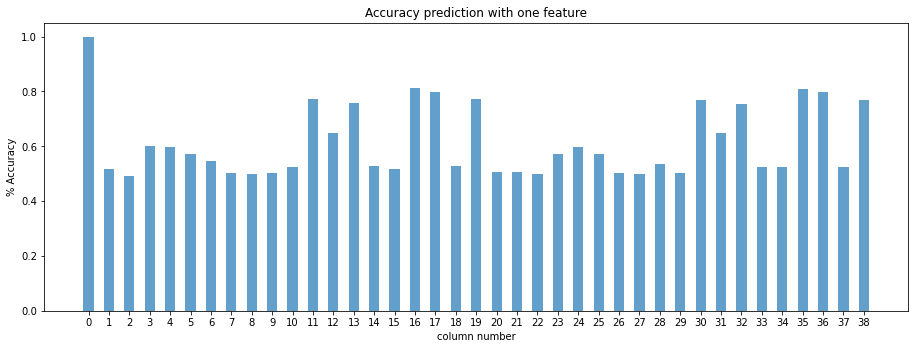

In [252]:
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
plt.bar(col,Acc, width=0.5, alpha=0.7)
plt.xlabel('column number')
plt.ylabel('% Accuracy')
axes.set_xticks(np.arange(len(league.columns)))
plt.title("Accuracy prediction with one feature")
print("The next graph is from the data printed above")
plt.show()

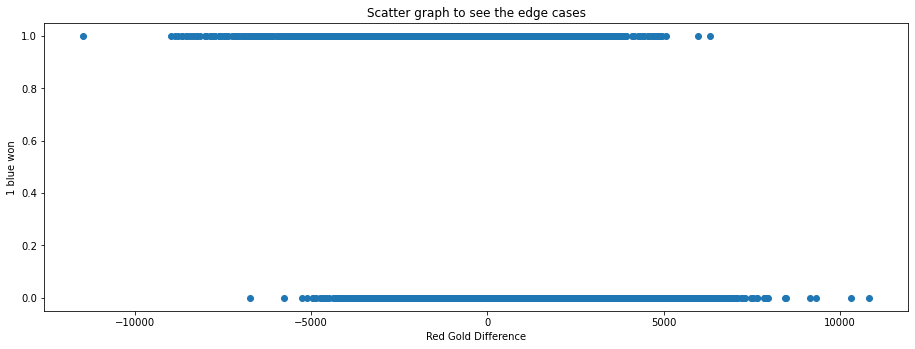

In [253]:
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
plt.scatter(league['redGoldDiff'], y)
plt.xlabel('Red Gold Difference')
plt.ylabel('1 blue won')
plt.title("Scatter graph to see the edge cases")
plt.show()

In the next cell I will get rid of the edge cases:

Whenever a team had a huge lead on gold and experience but still lost the game I will consider it as an abnormal senerio

In [254]:
league.drop(league.loc[(league['redGoldDiff'] < -4500) & (league['blueWins'] == 0)].index, axis = 0, inplace=True)
league.drop(league.loc[(league['redGoldDiff'] >  4500) & (league['blueWins'] == 1)].index, axis = 0, inplace=True)

In [255]:
league.drop(league.loc[(league['redExperienceDiff'] < -4500) & (league['blueWins'] == 0)].index, axis = 0, inplace=True)
league.drop(league.loc[(league['redExperienceDiff'] >  4500) & (league['blueWins'] == 1)].index, axis = 0, inplace=True)

We can tell that the most important information to take in order to predict wich team would win is about the gold and experience

In [256]:
y = league.blueWins
y = np.array(y)

In [257]:
relevantDF = league[X]
K = [1,3,5,7,10,25,50,100]
print("This is the knn moudle with only the important data")
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.4,random_state=1)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    print("knn =", k,": ",metrics.accuracy_score(y_test, y_pred))

This is the knn moudle with only the important data
knn = 1 :  0.6444895886236668
knn = 3 :  0.6818181818181818
knn = 5 :  0.6952767902488572
knn = 7 :  0.702386998476384
knn = 10 :  0.7089893346876587
knn = 25 :  0.7252412392077197
knn = 50 :  0.7282884713052311
knn = 100 :  0.729050279329609


In [258]:
print("This is the knn moudle with all the data")
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(league, y, test_size=0.3,random_state=1)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    print("knn =", k,": ",metrics.accuracy_score(y_test, y_pred))

This is the knn moudle with all the data
knn = 1 :  0.6445497630331753
knn = 3 :  0.6756939742721734
knn = 5 :  0.6993906567366283
knn = 7 :  0.7115775220040623
knn = 10 :  0.7176709546377793
knn = 25 :  0.7335815842924848
knn = 50 :  0.7383209207853758
knn = 100 :  0.7373053486797563


In [259]:
print(relevantDF.shape)
print(league.shape)

(9844, 10)
(9844, 39)


We can see from the results above that when we are taking the important data with 10 culomn we are getting approximately the same result as if we are taking all the features in the data


Since we have a lot of data we can see that some of this data is repetitve for example the total gold for both teams when we have the gold difference appearing twice so we can leave one out also. Also the amount of wards is not helping basically you place a ward so you will see if someone is coming to help the enemy kill you but we have a column for the kills.

In [260]:
league.drop(['blueWins'], axis = 1, inplace=True)
league.drop(['blueWardsPlaced','blueWardsDestroyed'], axis = 1, inplace=True)
league.drop(['redWardsPlaced','redWardsDestroyed'], axis = 1, inplace=True)

Dummy module option

In [261]:
print("Amount of victories for each team (0 - red victory , 1 - blue victory)")
print(pd.value_counts(y))

Amount of victories for each team (0 - red victory , 1 - blue victory)
0    4929
1    4915
dtype: int64


In [262]:
print("Accuracy for dummy moudle in the test group ",y_test.mean())
print("Accuracy for dummy moudle for all the group ",y.mean())

Accuracy for dummy moudle in the test group  0.5104942450914015
Accuracy for dummy moudle for all the group  0.49928890694839495


If we were to use dummy moudle it would be insuffisant with accuracy of about 50% and in the knn moudle we get about 72% accuracy

KNN module with no test and train group

In [263]:
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    print("knn =", k,": ",metrics.accuracy_score(y, y_pred))

knn = 1 :  1.0
knn = 3 :  0.8215156440471353
knn = 5 :  0.7862657456318569
knn = 7 :  0.7671678179601787
knn = 10 :  0.7536570499796831
knn = 25 :  0.7407557903291345
knn = 50 :  0.7352702153596099
knn = 100 :  0.7313084112149533


When the knn is 1 so there is 100% accuracy this is called overfitting because with all the existing data it will perform perfect but once we insert new data to predict this kind of moudle won't give us the best results, I would have take knn = 5
because it will give a 78% accuracy with enough neighbours for comparison.

** This moudle is more accurate then the ones we saw above because here we didn't split the data to test group and learning group

<b>Improving the module:</b>

After getting to accuarcy of 73% I wanted to improve it so I took all the indexes that the predicted probabilty was 0.45-0.55
meaning there's a chance of mistake in the prediction.
so I took 2 different features built a new module with them and relied on that module, even though this module alone has accuracy of 61%

In [264]:
monster = league[['redEliteMonsters' ,'blueEliteMonsters']]
knn = KNeighborsClassifier(n_neighbors=25)
X_train, X_test, y_train, y_test = train_test_split(monster, y, test_size=0.3,random_state=1)
knn.fit(X_train , y_train)
y_pred2 = knn.predict(X_test)
print("knn = 25",":",metrics.accuracy_score(y_test, y_pred2))
prob2 = pd.DataFrame(knn2.predict_proba(X_test))
prob2

knn = 25 : 0.6100203114421124


,0,1
0,0.40,0.60
1,0.72,0.28
2,0.80,0.20
3,0.72,0.28
4,0.72,0.28
...,...,...
2949,0.48,0.52
2950,0.40,0.60
2951,0.40,0.60
2952,0.48,0.52


In [268]:
knn = KNeighborsClassifier(n_neighbors=50)
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.3,random_state=1)
knn.fit(X_train , y_train)
y_pred1 = knn.predict(X_test)
check = pd.DataFrame(knn.predict_proba(X_test))#converting it to df to use loc
ind = check.loc[(check[0] > 0.45) & (check[0] < 0.55)].index
prob1 = (knn.predict_proba(X_test))
for i in ind:
    prob1[i][0] = prob2.loc[i][0]
    prob1[i][1] = prob2.loc[i][1]
prob1[prob1 > 0.5] = 1
prob1[prob1 <= 0.5] = 0
print('Accuracy after improving the module: ' ,metrics.accuracy_score(y_test, prob1[:,1]))
print('Improved by 1%')

Accuracy after improving the module:  0.7433987813134733
Improved by 1%


*KNN: Cofusion Matrix*

In [278]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix: ")
print(confusion)

confusion matrix: 
[[1118  391]
 [ 400 1045]]


In [270]:
TP = confusion[1, 1]
print("True positive: " ,TP)
TN = confusion[0, 0]
print("True nagetive: " ,TN)
FP = confusion[0, 1]
print("False positive: " ,FP)
FN = confusion[1, 0]
print("False nagetive: " ,FN)

True positive:  1094
True nagetive:  1072
False positive:  374
False nagetive:  414


In [271]:
print("Accuracy: ",(TP + TN) / (TP + TN + FP + FN))
print("Classification Error: ",1-(TP + TN) / (TP + TN + FP + FN))
print("Recall: ", TP/(TP+FN))
print("Precision: ", TP/(TP+FP))
print("False positive rate: ", FP/(TN+FP))

Accuracy:  0.7332430602572783
Classification Error:  0.26675693974272174
Recall:  0.7254641909814323
Precision:  0.7452316076294278
False positive rate:  0.25864453665283543


In [272]:
b = 1
F = (1+b*b)*TP/((1+b*b)*TP + b*FN + FP)
print(F)

0.7352150537634409


<b>Classification with Gaussian module</b>

In [273]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.3, random_state=2)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy when using the Gaussian module:" ,accuracy_score(y_test, y_pred))

Accuracy when using the Gaussian module: 0.7322274881516587


*ROC Graph for Gaussian module:*

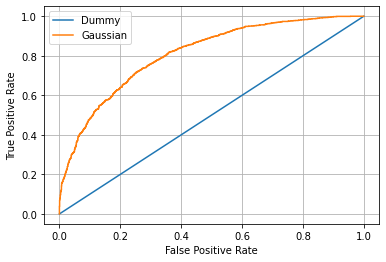

In [274]:
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.3, random_state=2)
y_pred = gnb.predict_proba(X_test)
y_pred = y_pred[:, 1] # taking only the positive outcomes
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)#using a saved function that to calculate the roc curve
plt.plot([0,1], [0,1], label='Dummy')
plt.plot(fpr, tpr, marker='', label='Gaussian')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [277]:
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.3, random_state=2)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy when using the Gaussian module:" ,accuracy_score(y_test, y_pred))

Accuracy when using the Gaussian module: 0.7322274881516587
